In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import gensim
import pickle
import re

In [2]:
assert(nltk.download('gutenberg'))
assert(nltk.download('punkt'))

[nltk_data] Downloading package gutenberg to
[nltk_data]     /home/davidhou8791/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/davidhou8791/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
words = nltk.corpus.gutenberg.words('melville-moby_dick.txt')

In [4]:
sents = nltk.corpus.gutenberg.sents('melville-moby_dick.txt')

In [5]:
lens = [len(s) for s in sents]

(array([4.952e+03, 2.815e+03, 1.265e+03, 5.910e+02, 2.530e+02, 9.600e+01,
        4.200e+01, 1.100e+01, 1.700e+01, 6.000e+00, 4.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1.        ,  19.03333333,  37.06666667,  55.1       ,
         73.13333333,  91.16666667, 109.2       , 127.23333333,
        145.26666667, 163.3       , 181.33333333, 199.36666667,
        217.4       , 235.43333333, 253.46666667, 271.5       ,
        289.53333333, 307.56666667, 325.6       , 343.63333333,
        361.66666667, 379.7       , 397.73333333, 415.76666667,
        433.8       , 451.83333333, 469.86666667, 487.9       ,
        505.93333333, 523.96666667, 542.        ]),
 <a list of 30 Patch objects>)

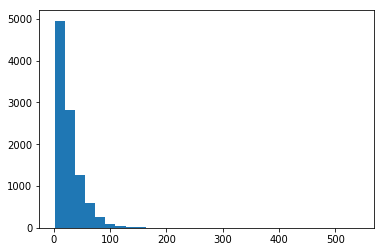

In [6]:
plt.hist(lens, bins=30)

In [7]:
np.quantile(lens, .9)

56.0

In [8]:
np.mean([int(l <= 32) for l in lens])

0.7090168008748384

# Parsing Words

In [38]:
w2v = gensim.models.KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin', binary=True, limit=1000000)

In [31]:
moby_dick_vectors = {}
moby_dick_vectors[''] = np.zeros((300,))
for d in '0123456789':
    moby_dick_vectors[d] = w2v.word_vec(d)

In [33]:
word_set = set()
for raw in words:
    w = raw.lower()
    if w[0].isalpha():
        word_set.add(w)

In [34]:
print(len(words), len(word_set))

260819 16951


In [56]:
missed = []
for w in word_set:
    if w not in moby_dick_vectors:
        try:
            moby_dick_vectors[w] = w2v.word_vec(w)
        except KeyError:
            missed.append(w)

In [57]:
print(len(missed))
print(missed[0:10])

2341
['bedevilling', 'kedron', 'erectly', 'demigorgon', 'unsmoothable', 'unvitiated', 'arrantest', 'plaguy', 'uncouthness', 'gamesome']


In [49]:
pickle.dump(moby_dick_vectors, open('data/moby_dick_vectors.p', 'wb'))

# Parsing Sentences

In [42]:
max_len = 32 # Fairly arbitrary, about 70% of sentences are <= to 32

In [64]:
moby_dick_sents = []
for raw in sents:
    s = []
    for w in raw:
        if len(s) >= max_len: break
        if w in moby_dick_vectors: s.append(w)
    while len(s) < 32: s.append('')
    moby_dick_sents.append(s)
    

In [65]:
len(moby_dick_sents)

10059

In [67]:
pickle.dump(moby_dick_sents, open('data/moby_dick_sents.p', 'wb'))